# Employee data

To predict whether employee left the company or retained using independent variables

In [28]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
employee = pd.read_csv("HR_comma_sep.csv")

In [3]:
employee.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
employee.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
employee.shape

(14999, 10)

In [6]:
employee.mean()

satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
dtype: float64

# column Left is the dependent variable

# Divinding the data as emplyee who left the company and employee who is retained

In [8]:
emp_left=employee[employee.left==1]
emp_left.shape

(3571, 10)

In [9]:
emp_retained=employee[employee.left==0]
emp_retained.shape

(11428, 10)

# Comparison between salary and dependent variable 

<AxesSubplot:xlabel='salary'>

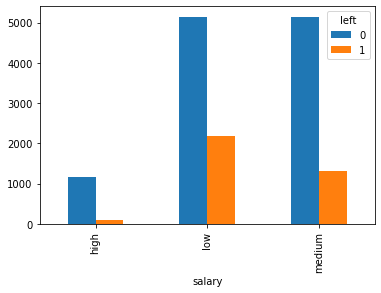

In [10]:
pd.crosstab(employee.salary,employee.left).plot(kind='bar')

# comparison between department and dependent variable

<AxesSubplot:xlabel='Department'>

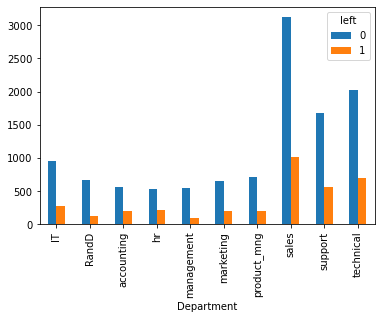

In [11]:
pd.crosstab(employee.Department,employee.left).plot(kind='bar')

# here we taking only some factors which are affecting dependent variable

In [12]:
imp_variables = employee[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
imp_variables.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


# as column salary is in catogarical format converting it into integer

In [13]:
salary_dummies = pd.get_dummies(imp_variables.salary, prefix="salary")


In [14]:
dummies = pd.concat([imp_variables,salary_dummies],axis=1)


In [15]:
 dummies.head()


,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [16]:
dummies.drop('salary',axis=1,inplace=True)

In [17]:
dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [30]:
corr=dummies.corr()

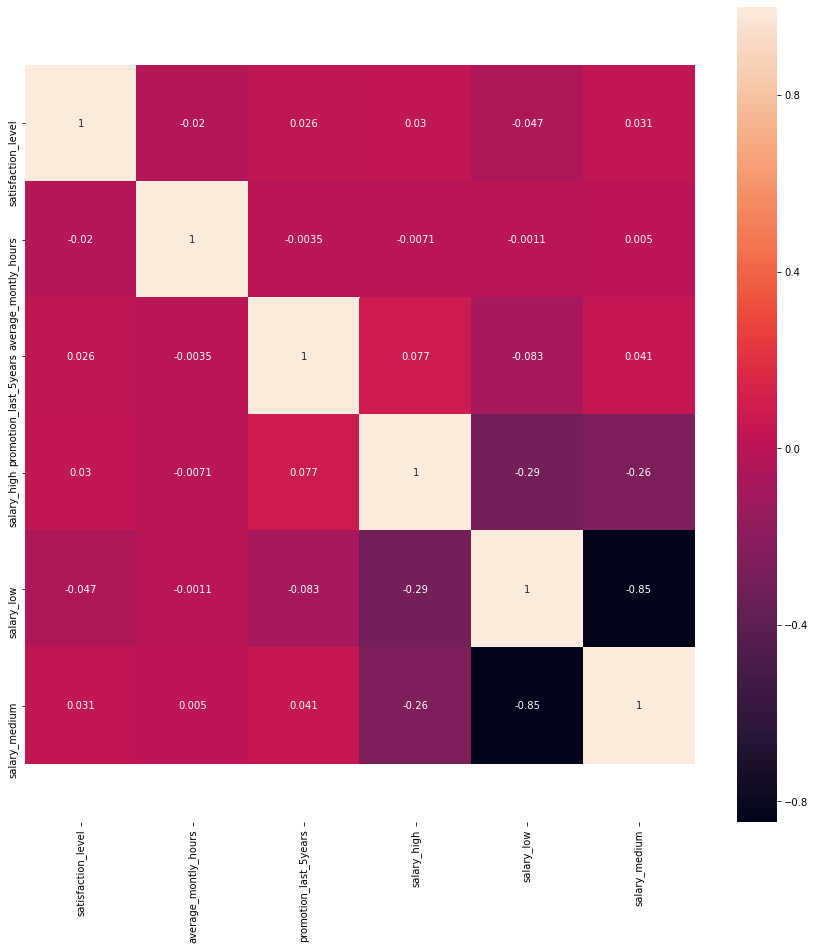

In [31]:
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr , xticklabels=corr.columns , yticklabels=corr.columns , annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

In [18]:
y=employee.left

In [20]:
X=dummies

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)


In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [23]:
model.fit(X_train, y_train)


LogisticRegression()

In [24]:
model.predict(X_test)


array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

# Finding accuracy of the model

In [25]:
model.score(X_test,y_test)


0.7803809523809524